In [ ]:
import re
import nltk
import pandas as pd
nltk.download('punkt')

import emoji
import numpy as np
from nltk.tokenize import word_tokenize
from tqdm import tqdm
tqdm.pandas()
from tqdm import trange
#from utils2 import get_dict

In [ ]:
# Define the 'tokenize' function that will include the steps previously seen
def tokenize(corpus):
    data = re.sub(r'[,!?;-]+', '.', corpus)
    data = nltk.word_tokenize(data)  # tokenize string to words
    data = [ ch.lower() for ch in data
             if ch.isalpha()
             or ch == '.'
             or emoji.get_emoji_regexp().search(ch)
           ]
    return data

In [ ]:
# Define new corpus
corpus = 'It is wednesday and it is raining'

# Print new corpus
print(f'Corpus:  {corpus}')

# Save tokenized version of corpus into 'words' variable
words = tokenize(corpus)

# Print the tokenized version of the corpus
print(f'Words (tokens):  {words}')

In [ ]:
# Define the 'get_windows' function
def get_windows(words, C):
    i = C
    while i < len(words) - C:
        center_word = words[i]
        context_words = words[(i - C):i] + words[(i+1):(i+C+1)]
        yield context_words, center_word
        i += 1

In [ ]:
for x, y in get_windows(['It','is','wednesday','and','it','is','raining'], 2):
    print(f'{x}\t{y}')

In [ ]:
#define get_dict() function
def get_dict(words):
    # This function returns:
    # - word2Ind: dictionary mapping each unique word to a unique index
    # - Ind2word: dictionary mapping each unique index to a unique word

    # Get unique words using set()
    vocab = set(words)

    # Dictionaries to return
    word2Ind = {}
    Ind2word = {}

    # Loop through 'vocab' and create the dictionaries
    for i, word in enumerate(vocab):
        word2Ind[word] = i
        Ind2word[i] = word

    return word2Ind, Ind2word

# Get 'word2Ind' and 'Ind2word' dictionaries for the tokenized corpus
word2Ind, Ind2word = get_dict(words)

In [ ]:
Ind2word

In [ ]:
# Print value for the key '2' within Ind2word dictionary
print("Word which has index 2:  ",Ind2word[2] )

In [ ]:
# Save length of word2Ind dictionary into the 'V' variable
V = len(word2Ind)

# Print length of word2Ind dictionary
print("Size of vocabulary: ", V)

In [ ]:
# Create vector with the same length as the vocabulary, filled with zeros
center_word_vector = np.zeros(V)

# Print vector
center_word_vector

In [ ]:
# Replace element number 'n' with a 1
center_word_vector[2] = 1
center_word_vector

In [ ]:
# Define the 'word_to_one_hot_vector' function that will include the steps previously seen
def word_to_one_hot_vector(word, word2Ind, V):
    one_hot_vector = np.zeros(V)
    one_hot_vector[word2Ind[word]] = 1
    return one_hot_vector

In [ ]:
word_to_one_hot_vector('wednesday', word2Ind, V)

In [ ]:
context_words = ['it', 'is', 'and', 'it']
# Create one-hot vectors for each context word using list comprehension
context_words_vectors = [word_to_one_hot_vector(w, word2Ind, V) for w in context_words]

context_words_vectors

In [ ]:
# Compute mean of the vectors using numpy
np.mean(context_words_vectors, axis=0)

In [ ]:
# Define the 'context_words_to_vector' function that will include the steps previously seen
def context_words_to_vector(context_words, word2Ind, V):
    context_words_vectors = [word_to_one_hot_vector(w, word2Ind, V) for w in context_words]
    context_words_vectors = np.mean(context_words_vectors, axis=0)
    return context_words_vectors

In [ ]:
words

In [ ]:
# Print vectors associated to center and context words for corpus
for context_words, center_word in get_windows(words, 2):  # reminder: 2 is the context half-size
    print(f'Context words:  {context_words} -> {context_words_to_vector(context_words, word2Ind, V)}')
    print(f'Center word:  {center_word} -> {word_to_one_hot_vector(center_word, word2Ind, V)}')
    print()

In [ ]:
# Define the generator function 'get_training_example'
def get_training_example(words, C, word2Ind, V):
    for context_words, center_word in get_windows(words, C):
        yield context_words_to_vector(context_words, word2Ind, V), word_to_one_hot_vector(center_word, word2Ind, V)
#why we use yield instead of return? ---> because we want to return a generator object that can be iterated over to produce a sequence of values (one at a time) instead of returning a single object (list, tuple, etc.) that contains all the values. This is because the size of the training set is very large and we don't want to store it in memory. Instead, we want to generate it on the fly. This is what the generator object does. It generates one training example at a time, only when we need it, instead of storing all the training examples in memory. This is why we use yield instead of return. The yield statement is used to define a generator, replacing the return of a function to provide a result to its caller without destroying local variables. Unlike a function, where on each call it starts with new set of variables, a generator will resume the execution where it was left off. The yield keyword helps a function to remember its state. Using yield keyword, we can write a generator function that can generate a sequence of values. 
 
 

In [ ]:
# Print vectors associated to center and context words for corpus using the generator function
for context_words_vector, center_word_vector in get_training_example(words, 2, word2Ind, V):
    print(f'Context words vector:  {context_words_vector}')
    print(f'Center word vector:  {center_word_vector}')
    print()

## A Question?

Can you tell me the each dimension for inputs, weights and output matrix for V=10 and hidden layer neuron count 3?

Input vector dimensions: V = 10
Weight matrix dimensions (input to hidden): V x N = 10 x 3
Output vector dimensions: V = 10

In [ ]:
# Set the vocabulary size and number of neurons in the hidden layer
V = 10
N = 3

# Define a one-hot encoded input vector for a specific target word
target_word_index = 5  # Choose any index between 0 and V-1
input_vector = np.zeros(V)
input_vector[target_word_index] = 1

# Initialize the weight matrix between input and hidden layer
# The weights are typically initialized randomly for training
weights_input_hidden = np.random.rand(V, N)

# Compute the hidden layer representation (word vector)
hidden_layer_vector = np.dot(input_vector, weights_input_hidden)

# Initialize the weight matrix between hidden and output layer
# Again, these weights are typically initialized randomly for training
weights_hidden_output = np.random.rand(N, V)

# Compute the output vector
output_vector = np.dot(hidden_layer_vector, weights_hidden_output)

# Display the results
print("Input Vector:")
print(input_vector)

print("\nWeight Matrix (Input to Hidden):")
print(weights_input_hidden)

print("\nHidden Layer Vector (Word Vector):")
print(hidden_layer_vector)

print("\nWeight Matrix (Hidden to Output):")
print(weights_hidden_output)

print("\nOutput Vector:")
print(output_vector)


## SKIP GRAM

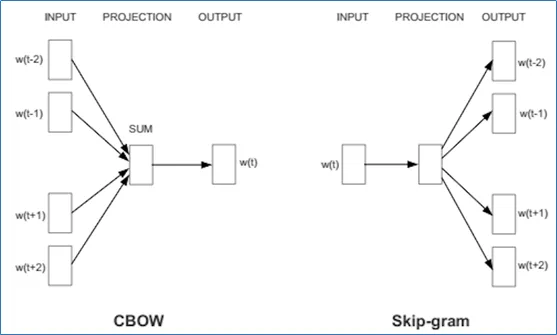

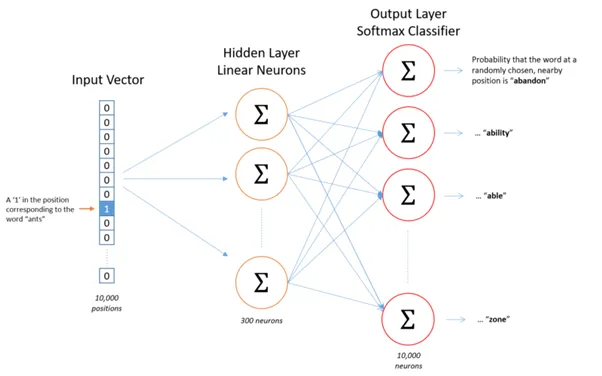

In [ ]:
data = pd.read_csv('../../Data/cleanedJobs.csv')
print(data.shape)
data.head()


In [ ]:
from bs4 import BeautifulSoup
import nltk
sent_detector = nltk.data.load('tokenizers/punkt/turkish.pickle')
import string
from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [ ]:
def Tokenize(metin):
    
    #Belli html karakterleri noktaya çeviriyoruz ki cümle sonları daha iyi bulunabilsin
    metin  = str(metin).replace('<br>', ' . ').replace('</p>', ' . ').replace('</br>', ' . ')
    metin = metin.replace('<p>', ' . ').replace('.',' . ').replace('</li>', ' . ')
    
    #bazı karakterleri işlemlerin daha doğru yapılabilmesi adına değiştiriyoruz
    metin = metin.replace('&nbsp;', ' ').replace('“', ' ').replace('·', ' ')
    metin = metin.replace('•', ' ').replace('\xa0', ' ')
    metin = metin.replace('”', ' ').replace('nan', '').replace('\r', '').replace('’', ' ').replace('\n', '')

    metin=metin.lower().replace('i̇','i')
   
    sentences = []
    
    if  not (metin and metin.strip()):
        return sentences       
    
    sentences =  sent_detector.tokenize(metin)  

    #get text with beautifulsoup from every sentence in sentences
    sentences = [ BeautifulSoup(x).get_text(" ") for x in sentences if len(x)>1 ]  

    table = str.maketrans({key: ' ' for key in string.punctuation}) #replace punctuation with space

    sentences = [ x.translate(table) for x in sentences if len(x)>1 ]  

    sentences = [ re.sub(' +',' ',x)  for x in sentences if len(x)>1 ]   
    
    #return if length every element in sentences is greater than 1
    return [ x.strip() for x in sentences if len(x)>2 ]

In [ ]:
Tokenize('<p>  Ok allright! </p><br> <p> Cleaned </p>')

In [ ]:
corpus[22]

In [ ]:
#get column Clean and apply Tokenize function to it and save it to an array
sents = data['Qualifications'].progress_apply(Tokenize).values
corpus = []
for sublist in tqdm(sents):
    for item in sublist:
        temp = item.split()
        if(len(temp)>1):
            corpus.append(temp)
corpus

In [ ]:
phrases = Phrases(sentences=corpus)
bigram = Phraser(phrases)

for index,sentence in enumerate(tqdm(corpus)):
    corpus[index] = bigram[sentence]

In [ ]:
phrases2_tri = Phrases(sentences=corpus)
trigram = Phraser(phrases2_tri)

for index,sentence in enumerate(tqdm(corpus)):
    corpus[index] = trigram[sentence]

In [ ]:
phrases3_four = Phrases(sentences=corpus)
fourgram = Phraser(phrases3_four)

for index,sentence in enumerate(tqdm(corpus)):
    corpus[index] = fourgram[sentence]

In [ ]:
corpus

In [ ]:
model = Word2Vec(corpus)# vector_size==100, window=5, min_count=5
model.train(corpus, total_examples=len(corpus), epochs=15)


In [ ]:
model.wv.most_similar('react')

In [ ]:
print(model.wv.similarity('javascript', 'vue'))
print(model.wv.similarity('javascript', 'engineer'))

In [ ]:
model.wv.doesnt_match(['python', 'military', 'java'])

In [ ]:
model.wv.most_similar(positive=["ankara", "istanbul"], negative=["kızılay"], topn=3)

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
def display_pca_scatterplot(model, words=None, sample=0):

    word_vectors = np.array([model.wv.get_vector(w) for w in words]) 

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
        #plt.text(x+0.05, y+0.05, word, fontsize=10)

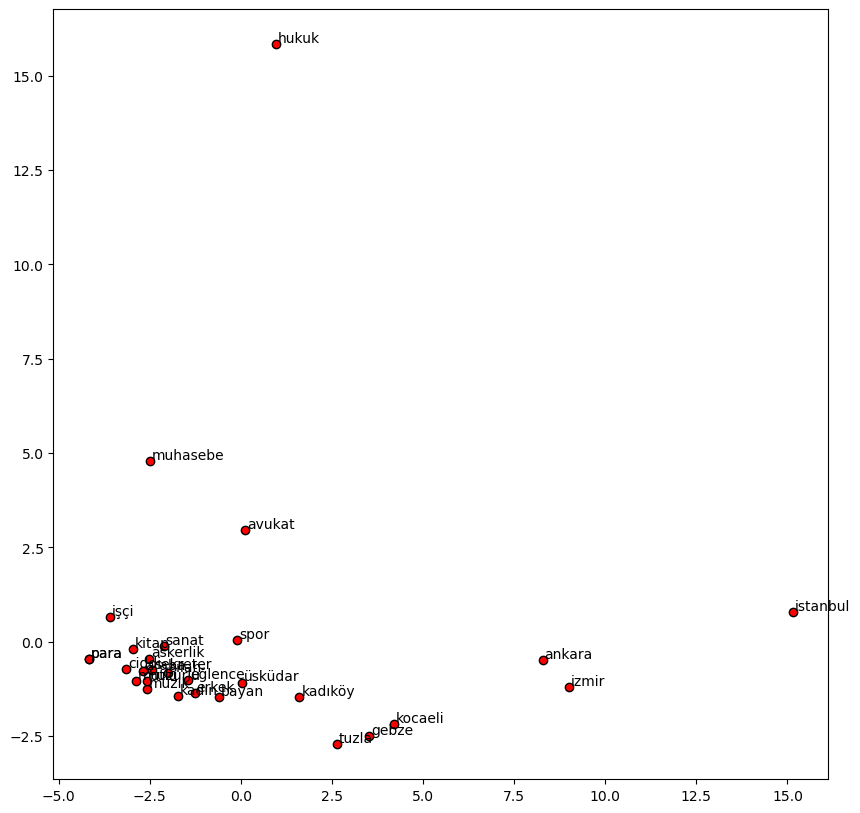

In [41]:
display_pca_scatterplot(model, 
                        ['istanbul', 'gebze', 'ankara', 'izmir', 'kocaeli', 'tuzla', 'kadıköy', 'üsküdar',
                         'kadın', 'erkek',
                         'askerlik', 'spor', 'müzik', 'eğlence', 'sanat', 'kitap', 'silah',
                          'muhasebe', 'para', 'para', 'avukat', 'hukuk', 'mutlu', 'ciddi', 'huzurlu', 'bayan',
                         'sekreter','işçi','araba'])

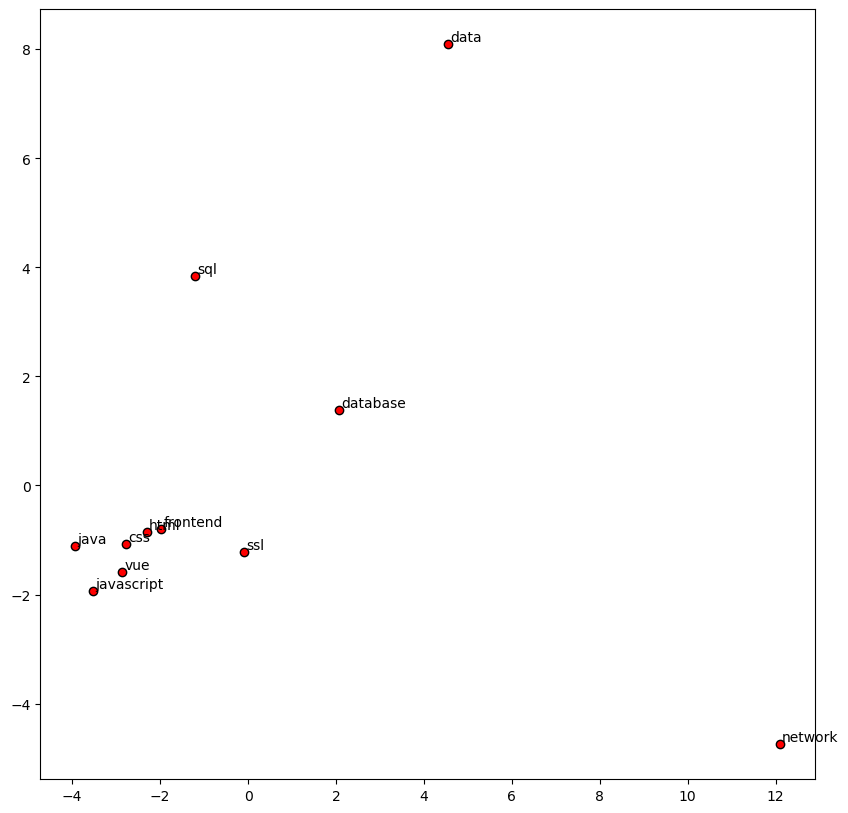

In [40]:
display_pca_scatterplot(model, 
                        ['java','sql','database','vue','frontend','javascript','ssl','network','html','css','data',])